<a href="https://colab.research.google.com/github/Bazinga97/ML_Projects/blob/main/Credit_Risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective:**
   

    Exploratory data analysis
    KNN
    Hyperparameter Tuning
    Streamlit
    List item







from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Making artificial data with the help of sklearn's make_classification method:
X, y = make_classification(10000, 20, n_classes=2, weights=[0.75])

# Gives count of each target's class:
uni, cnt = np.unique(y, return_counts=True)
for i, (j, k) in enumerate(zip(uni, cnt)):
    print(j, "--", k)

X = pd.DataFrame(X)

# Function to select random indexes:
def create_index(nrows):
    l = np.random.randint(0, nrows, 50)
    return l

# Making some rows as Null.
for i in range(X.shape[1]):
    X.iloc[create_index(X.shape[0]), i] = None
    
# To check the null values in every column:
X.isnull().sum()

# Splitting:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Making sample pipeline
over = SMOTE() ## Object for smote #sampling_strategy=0.1
model = DecisionTreeClassifier()
steps = [('impute', IterativeImputer()),('over', over),('model', model)]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

res = pipeline.predict(X_test)

print(f"The accuracy of the Decision Tree Model is:{accuracy_score(y_test, res)}")


## Importing the libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification

## Data Preprocessing

Column transformer

*  Column transformer
*  Train-test split
*  One_hot encoding
*  Imputer


In [13]:
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedKFold,RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Imblearn Library: used to deal with

For imbalanced dataset : particulary over-sampling using SMOTE (Synthetic Minority Over-sampling Technique)

Pipeline: chain multiple steps involving --> 1. Preprocessing 2. Model Training

Integration allows to encapsulation of entire workflow into a single object --> easy to manage and apply simultaneously.




In [14]:
pip install imbalanced-learn


In [15]:
pip install --upgrade imbalanced-learn


In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

### Metrices: Measure of performance


# *   Classification: 1. Accuracy 2. Confusion matrix

## **1. Accuracy: No. of correct pred/ Total pred   --> may be misleading in some cases**
## **2**. **Confusion matrix :  number of correct and incorrect predictions made by the model.**
      

*   Precision :
*   Recall
*   F1-Score
*   AUC_ROC





*   Regression


*   Mean squared error (MSE)
*   Root Mean squared error (RMSE)
*   Mean Absolute error
*   R2








In [17]:
pip install --upgrade scikit-learn


In [18]:
import sklearn
print(sklearn.__version__)


1.4.2


In [19]:
!pip install scikit-learn


In [20]:
!pip install --upgrade scikit-learn


In [21]:
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score,precision_score,f1_score

## Machine Learning models



*   Regression : LR; LOR; KNN;
*   SVC


*   Decision Trees; RF
*   XGBoost classifier


*   LBM classifier
*   CatBoost classifier






In [22]:
!pip install catboost


  Using cached catboost-1.2.5-cp310-cp310-manylinux2014_x86_64.whl (98.2 MB)


# Pickling : process of converting a python object into a byte stream; also it saves your python objects into a format that can be stored or transferred

In [28]:
## For Machine Learning Models:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## For Pickling:
import pickle

np.random.seed(31415): random number generation in NumPy follows a predictable sequence, allowing for reproducibility
31415: same random numbers every time you code

In [24]:
## Setting the seed to allow reproducibility
np.random.seed(31415)

In [25]:
df= pd.read_csv("credit_risk_dataset.csv")

In [26]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### **df.describe: Descriptive statistics **



*   Summarize central tendency; Dispersion and shape of dataframe
*   Identification of data distribution and identify issues



*   Count: Numbe of Non-null values
*   Mean ;
*   Standard deviation: measure spread of data from mean; indicates how much
    deviation from mean
*   25th (25%), 50th (50% or median), and 75th (75%) percentiles: These    
    values divide the data into quartiles, indicating the spread of the data.


*   Unique
*   TOP/Frequecy





In [29]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Duplicates

In [30]:
dups = df.duplicated()
dups.value_counts()

False    32416
True       165
Name: count, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

Checking for Categorical/ Numerical columns

In [31]:
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

The number of Categorical columns are: 4
The number of Numerical columns are: 8


 Printing the different columns with their cardinality (number of unique elements in each column)

In [32]:
print("The NUMERICAL columns are:\n")
for i in ncol:
    print("->",i,"-",df[i].nunique())

print("\n---------------------------\n")
print("The CATEGORICAL columns are:\n")
for i in ccol:
    print("->",i,"-",df[i].nunique())

The NUMERICAL columns are:

-> person_age - 58
-> person_income - 4295
-> person_emp_length - 36
-> loan_amnt - 753
-> loan_int_rate - 348
-> loan_status - 2
-> loan_percent_income - 77
-> cb_person_cred_hist_length - 29

---------------------------

The CATEGORICAL columns are:

-> person_home_ownership - 4
-> loan_intent - 6
-> loan_grade - 7
-> cb_person_default_on_file - 2


In [33]:
df.drop(['loan_int_rate'],axis=1,inplace=True)

In [34]:
df["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [35]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [36]:
df["loan_status"].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [37]:
df.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

## Data highly IMBALANCED: oversampling techniques like **KNN-SMOTE**

MCAR (Missing Completely at Random):


1.   Missingness is unrelated to any observed or unobserved variables.
No systematic reason for missing values.
Considered the least problematic type of missing data.





MAR (Missing at Random):

1.   Missingness depends on other observed variables but not on the missing data itself.
Related to some observed variables but not to the missing values themselves.
Common in longitudinal studies or surveys where certain groups are less likely to respond.



MNAR (Missing Not at Random):


1.   Missingness is related to the missing values themselves, even after accounting for observed data.
Related to unobserved data or the missing values themselves.
Introduces bias into analyses and requires more sophisticated handling methods.



In [38]:
import matplotlib.pyplot as plt


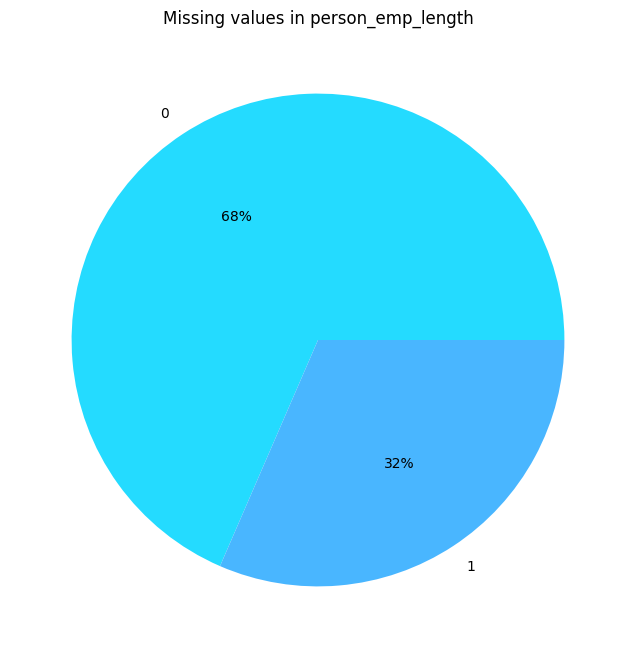

In [39]:
## Missing values in each target class:
p=df.groupby(["loan_status"])["person_emp_length"].apply(lambda x:x.isnull().sum())

fig,ax=plt.subplots(1,1,figsize=(8,8))
# ax[0].set_title("Missing values in loan_int_rate")
# ax[0].pie(l.values, labels=l.index, colors=sns.color_palette('bright'), autopct='%.0f%%')

ax.set_title("Missing values in person_emp_length")
ax.pie(p.values, labels=p.index, colors=sns.color_palette('cool'), autopct='%.0f%%')
fig.show()

### Note: it's essential to split the dataset into training and testing sets before implementing any preprocessing techniques such as outlier removal, handling missing values, oversampling, etc

Train_test split : df.drop(Y) ; df.column(X); random state set random seed for reporducibility ; test_size  = generally 70/80:30/20; stratify= df (Target variable class variable is preserved-->particularly useful for imblanced datasets ; shuffle bias --> Parameter shuffles the data before splitting ensuring points to be randomly ordered to avoid bias  

In [40]:
X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

In [41]:
y.value_counts(normalize=True)

loan_status
0    0.781845
1    0.218155
Name: proportion, dtype: float64

In [42]:
y_test.value_counts(normalize=True)

loan_status
0    0.781801
1    0.218199
Name: proportion, dtype: float64

Unique values

In [43]:
for col in X:
    print(col, '--->', X[col].nunique())
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

person_age ---> 58

person_income ---> 3704

person_home_ownership ---> 4
person_home_ownership
RENT        50.517956
MORTGAGE    41.279159
OWN          7.899785
OTHER        0.303100
Name: proportion, dtype: float64

person_emp_length ---> 35

loan_intent ---> 6
loan_intent
EDUCATION            19.812769
MEDICAL              18.538981
VENTURE              17.725599
PERSONAL             17.004297
DEBTCONSOLIDATION    16.002916
HOMEIMPROVEMENT      10.915439
Name: proportion, dtype: float64

loan_grade ---> 7
loan_grade
A    33.199048
B    31.978975
C    19.774401
D    11.160988
E     2.938920
F     0.751995
G     0.195672
Name: proportion, dtype: float64

loan_amnt ---> 721

loan_percent_income ---> 77

cb_person_default_on_file ---> 2
cb_person_default_on_file
N    82.45089
Y    17.54911
Name: proportion, dtype: float64

cb_person_cred_hist_length ---> 29



Outlier removal

In [44]:
X.loc[X['person_age']>=80, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32416,94,24000,RENT,1.0,MEDICAL,C,6500,0.27,N,27
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,0.03,N,2
747,123,78000,RENT,7.0,VENTURE,B,20000,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,0.00,N,25
32422,80,64000,RENT,7.0,MEDICAL,B,6800,0.11,N,25
81,144,250000,RENT,4.0,VENTURE,C,4800,0.02,N,3
575,123,80004,RENT,2.0,EDUCATION,B,20400,0.25,N,3
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,0.11,N,24


In [45]:
X = X.loc[X['person_age']<80, :]

In [46]:
X.loc[X['person_emp_length']>=60, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,0.10,N,4
0,22,59000,RENT,123.0,PERSONAL,D,35000,0.59,Y,3


In [47]:
y = y[X.index]

### Pipelines

The main pipeline consists of two distinct stages tailored for preprocessing numerical and categorical variables, respectively:

For Numerical Variables:

Iterative Imputer: This step employs iterative imputation to handle missing values within numerical features, ensuring comprehensive data integrity.
Scaling: Subsequently, scaling techniques are applied to maintain consistent scales among numerical features, which aids in model convergence and performance.
For Categorical Variables:

One-Hot Encoder: Categorical variables undergo one-hot encoding, enabling the transformation of each categorical feature into a binary format for enhanced model interpretability.
Finally, to address the imbalance in the dataset, the Synthetic Minority Over-sampling Technique (SMOTE) is employed. SMOTE generates synthetic samples to rebalance the class distribution, thereby mitigating the effects of data skewness and enhancing the predictive capability of the model.

In [48]:
# Creating a pipeline for numerical columns:
num_pipe = Pipeline([
    ('impute', IterativeImputer()),     # MICE (Multivariate Imputation by Chained Equations)
    ('scale', StandardScaler()),
])

# Using the Column Transformer class for binding the above numeric pipeline and the preprocessing steps of categorical columns:
ct = ColumnTransformer([
    ('num_pipe', num_pipe, make_column_selector(dtype_include=np.number)),
    ('cat_cols', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object))
], remainder='passthrough')

# Setting up the models to be tested upon and the parameters for their pipelines:
grid = {
    XGBClassifier():
    {'model__n_estimators':[i*100 for i in range(10)],
     'model__max_depth':[6,8,10,12,14,16],
     'model__learning_rate':[0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                            KNeighborsRegressor()]},

    LGBMClassifier(class_weight='balanced', random_state=0):
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                            KNeighborsRegressor()]}
}


**Hyperparameter tuning** is the process of selecting the optimal set of hyperparameter values for a machine learning model. Hyperparameters are settings that are external to the model and cannot be learned from data.

Tuning hyperparameters is crucial because they control aspects of the model's training process and complexity, significantly impacting its performance.

Common techniques for hyperparameter tuning include:

**Grid search** - Exhaustively searches a manually specified subset of hyperparameter combinations.

**Random search**- Randomly samples hyperparameter values from predefined distributions.

**Bayesian optimization** - Builds a probabilistic model to intelligently explore the hyperparameter space.

**Gradient-based methods** - Use gradients of the objective function to optimize hyperparameters.

In [49]:
for i, (clf, param) in enumerate(grid.items(), 1):
    print(f"{i}. {clf}\n")
    print(f"List of Hyperparameters: {param}\n")
    print('-' * 50)


1. XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

List of Hyperparameters: {'model__n_estimators': [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], 'model__max_depth': [6, 8, 10, 12, 14, 16], 'model__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3], 'coltf__num_pipe__impute__estimator'

## DataFrame full_df to store the results of each model's hyperparameter tuning.
It also initializes an empty dictionary best_algos to store the best models found during hyperparameter tuning. The loop iterates over each model and its corresponding hyperparameter grid in the grid dictionary.

**Inside the loop:**

SMOTE is initialized for oversampling.

A pipeline is created with preprocessing steps, SMOTE for oversampling, and the model.

Randomized SearchCV is used to find the best hyperparameters for the current model.

Results are stored in a DataFrame all_res.

Relevant columns (params and mean_test_score) are extracted from all_res and concatenated to full_df.

The best estimator for the current model is stored in the best_algos dictionary.
Finally, full_df contains the results of hyperparameter tuning for all models, and best_algos contains the best models found for each algorithm

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

# Create an empty DataFrame to store results
full_df = pd.DataFrame()

# Dictionary to store the best models
best_algos = {}

# Changing the ordering of the columns for ease of understanding
X = X[X.select_dtypes(include=[np.number]).columns.append(X.select_dtypes("O").columns)]

# Loop through each model and its parameters in the grid
for model, param in grid.items():
    # Initialize SMOTE for oversampling
    smt = SMOTE(random_state=42)

    # Create a pipeline for preprocessing, SMOTE, and the model
    pipe = Pipeline([
        ('coltf', ct),  # Column transformer for preprocessing
        ('smote', smt),  # SMOTE for oversampling
        ('model', model)  # Model to train
    ])

    print(f"Training {model}!!\n")

    # Conduct Randomized Search to find the best hyperparameters
    gs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy', verbose=3, n_iter=4, random_state=0)

    print("Fitting!!\n")
    gs.fit(X, y)

    print("Gathering Results!!\n")

    # Extract results and store in DataFrame
    all_res = pd.DataFrame(gs.cv_results_)
    temp = all_res.loc[:, ['params', 'mean_test_score']]
    algo_name = str(model).split('(')[0]  # Extract the name of the algorithm
    temp['algo'] = algo_name

    # Concatenate results to full DataFrame
    full_df = pd.concat([full_df, temp], ignore_index=True)

    # Store the best estimator for each algorithm
    best_algos[algo_name] = gs.best_estimator_


Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)!!

Fitting!!

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END coltf__num_pipe__impute__estimator=RandomForestRegressor(random_state=0), model__learning_rate=0.3, model__max_depth=10, model__n_estimators=400;,

In [51]:
full_df.sort_values('mean_test_score', ascending=False)



,params,mean_test_score,algo
7,"{'model__n_estimators': 300, 'model__learning_...",0.935447,LGBMClassifier
1,"{'model__n_estimators': 900, 'model__max_depth...",0.931494,XGBClassifier
2,"{'model__n_estimators': 500, 'model__max_depth...",0.931033,XGBClassifier
0,"{'model__n_estimators': 400, 'model__max_depth...",0.929997,XGBClassifier
3,"{'model__n_estimators': 300, 'model__max_depth...",0.928232,XGBClassifier
6,"{'model__n_estimators': 300, 'model__learning_...",0.915605,LGBMClassifier
5,"{'model__n_estimators': 300, 'model__learning_...",0.914607,LGBMClassifier
4,"{'model__n_estimators': 300, 'model__learning_...",0.911422,LGBMClassifier


In [52]:
full_df.sort_values('mean_test_score', ascending=False).iloc[0, 0]

{'model__n_estimators': 300,
 'model__learning_rate': 0.1,
 'model__boosting_type': 'dart',
 'coltf__num_pipe__impute__estimator': KNeighborsRegressor()}

In [53]:
## Getting the pipeline of the best XGB Algorithm and LGB Algorithm:
be_xgb = best_algos['XGBClassifier']
be_lgb = best_algos['LGBMClassifier']
be_xgb,be_lgb

(Pipeline(steps=[('coltf',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num_pipe',
                                                   Pipeline(steps=[('impute',
                                                                    IterativeImputer(estimator=RandomForestRegressor(random_state=0))),
                                                                   ('scale',
                                                                    StandardScaler())]),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7ff558295a50>),
                                                  ('cat_cols',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   <s...
                                feature_types=None, gamma=None, grow_policy=None,
                                importa

 Training the best pipelines:

Repeated k-Fold Cross-Validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

We will use this technique here to test model performance once again before evaluating it.

- Training the XGB Model:

In [57]:
%%time
## A dry run of the best pipeline:
pipe_xgb = be_xgb
# evaluate pipeline using k-fold cross validation:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipe_xgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"The MEAN of score obtained after CROSS VALIDATION of the XGB Based Pipeline is: {scores.mean()} or {scores.mean()*100:.2f}%")

The MEAN of score obtained after CROSS VALIDATION of the XGB Based Pipeline is: 0.932593917593394 or 93.26%
CPU times: user 7.36 s, sys: 1.31 s, total: 8.66 s
Wall time: 11min 38s


In [58]:
%%time
## Fitting into best pipeline for evaluation:
pipe_xgb.fit(X, y)
## Getting predictions:
preds_xgb = pipe_xgb.predict(X_test)
## Getting probabilities:
probs_xgb = pipe_xgb.predict_proba(X_test)
## Accuracy Score:
print(f"The ACCURACY SCORE produced on the TEST SET by the XGB Based Pipeline is: {accuracy_score(y_test,preds_xgb)} or {accuracy_score(y_test,preds_xgb)*100}%.")

The ACCURACY SCORE produced on the TEST SET by the XGB Based Pipeline is: 0.9323308270676691 or 93.23308270676691%.
CPU times: user 1min 27s, sys: 1.2 s, total: 1min 28s
Wall time: 1min 15s


In [55]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier




In [59]:
%%time
## A dry run of the best pipeline:
pipe_lgb = be_lgb
# evaluate pipeline using k-fold cross validation:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipe_lgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"The MEAN of score obtained after CROSS VALIDATION of the LGBM Based Pipeline is: {scores.mean()} or {scores.mean()*100:.2f}%")

The MEAN of score obtained after CROSS VALIDATION of the LGBM Based Pipeline is: 0.9359584500563802 or 93.60%
CPU times: user 2.47 s, sys: 514 ms, total: 2.98 s
Wall time: 3min 30s


In [60]:
%%time
## Fitting into best pipeline for evaluation:
pipe_lgb.fit(X, y)
## Getting predictions:
preds_lgb = pipe_lgb.predict(X_test)
## Getting probabilities:
probs_lgb = pipe_lgb.predict_proba(X_test)
## Accuracy Score:
print(f"The ACCURACY SCORE produced on the TEST SET by the LGBM Based Pipeline is: {accuracy_score(y_test,preds_lgb)} or {accuracy_score(y_test,preds_lgb)*100}%.")

[LightGBM] [Info] Number of positive: 20370, number of negative: 20370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5694
[LightGBM] [Info] Number of data points in the train set: 40740, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
The ACCURACY SCORE produced on the TEST SET by the LGBM Based Pipeline is: 0.9326377167408316 or 93.26377167408316%.
CPU times: user 21.5 s, sys: 209 ms, total: 21.7 s
Wall time: 21.6 s


In [61]:
probs_xgb[:10]

array([[8.9655602e-01, 1.0344396e-01],
       [9.9673605e-01, 3.2639680e-03],
       [9.9293911e-01, 7.0609064e-03],
       [2.0819902e-04, 9.9979180e-01],
       [9.9994838e-01, 5.1646104e-05],
       [9.9996263e-01, 3.7383405e-05],
       [9.4979078e-01, 5.0209202e-02],
       [7.6365471e-04, 9.9923635e-01],
       [9.3241805e-01, 6.7581944e-02],
       [9.9905521e-01, 9.4478205e-04]], dtype=float32)

In [62]:
probs_lgb[:10]

array([[0.78391025, 0.21608975],
       [0.94393809, 0.05606191],
       [0.78610927, 0.21389073],
       [0.02178299, 0.97821701],
       [0.96427481, 0.03572519],
       [0.97263597, 0.02736403],
       [0.81756142, 0.18243858],
       [0.03507078, 0.96492922],
       [0.67576422, 0.32423578],
       [0.94873993, 0.05126007]])

Learning Curve

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


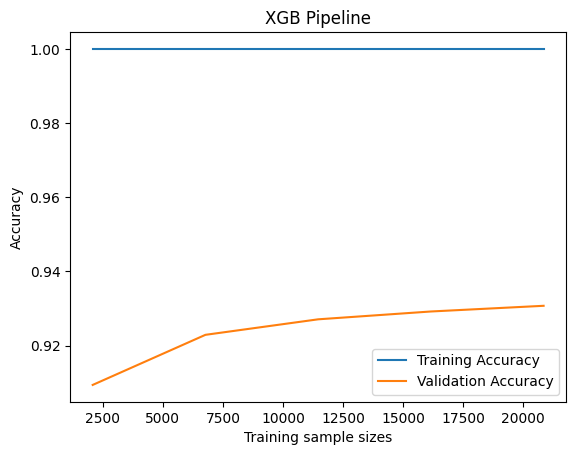

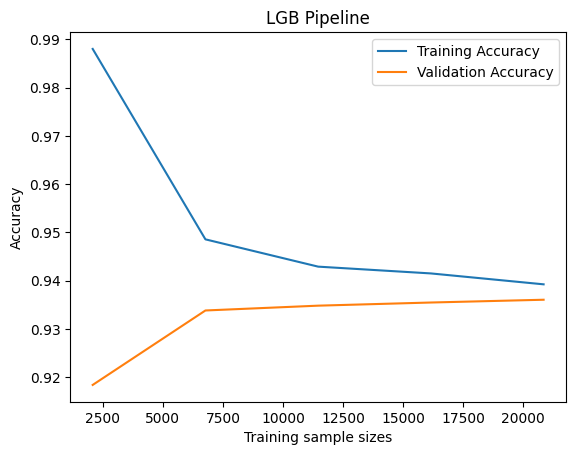

CPU times: user 10.2 s, sys: 2 s, total: 12.2 s
Wall time: 14min 44s


In [63]:
%%time
def funct_lc(be,X_train,y_train,title):
    a, b, c = learning_curve(be, X_train, y_train, n_jobs=-1, scoring='accuracy')
    plt.title(f"{title}")
    plt.plot(a, b.mean(axis=1), label='Training Accuracy')
    plt.plot(a, c.mean(axis=1),  label='Validation Accuracy')
    plt.xlabel('Training sample sizes')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

funct_lc(be_xgb,X,y,"XGB Pipeline")
funct_lc(be_lgb,X,y,"LGB Pipeline")

## Best model Selection

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  confusion_matrix, classification_report

In [70]:
## Function for confusion matrix:
def funct_cm(be,X_test,y_test,preds,title):
    ## Simple Confusion Matrix:
    print(confusion_matrix(y_test, preds))

   # print(f"\nThe Confusion Matrix for the {title}:")
    ## Plotting the Confusion Matrix:
   # plot_confusion_matrix(be, X_test, y_test)
   # plt.show()

    print(f"\nThe Classification Report for the {title}:")
    ## Classification Report:
    print(classification_report(y_test, preds))

    print(f"\nThe Final Accuracy Score for the {title}: {be.score(X_test, y_test)}")
    ## Accuracy Score
    print("\n")

funct_cm(be_xgb,X_test,y_test,preds_xgb,"XGB Pipeline")
funct_cm(be_lgb,X_test,y_test,preds_lgb,"LGB Pipeline")

[[5005   90]
 [ 351 1071]]

The Classification Report for the XGB Pipeline:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5095
           1       0.92      0.75      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.93      0.87      0.89      6517
weighted avg       0.93      0.93      0.93      6517


The Final Accuracy Score for the XGB Pipeline: 0.9323308270676691


[[5066   29]
 [ 410 1012]]

The Classification Report for the LGB Pipeline:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.94      0.93      0.93      6517


The Final Accuracy Score for the LGB Pipeline: 0.9326377167408316




## Precision_recall curve

In [72]:
from sklearn.metrics import plot_precision_recall_curve


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

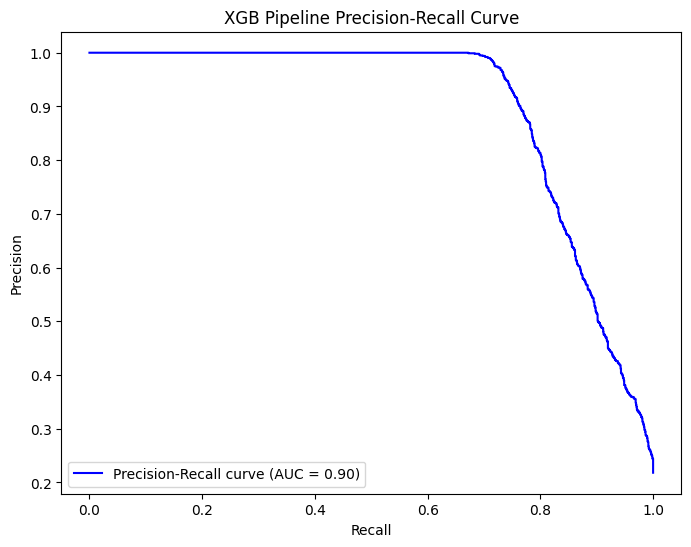

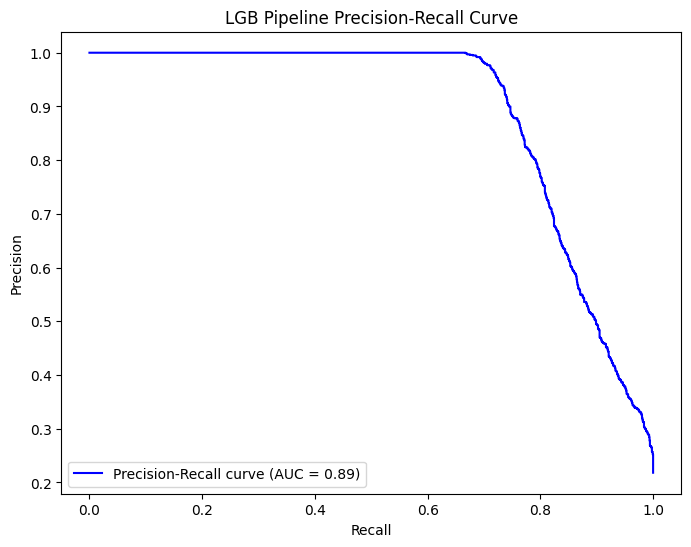

CPU times: user 1.59 s, sys: 88 ms, total: 1.68 s
Wall time: 1.68 s


In [73]:
%%time
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def plot_custom_precision_recall_curve(model, X_test, y_test, title):
    # Compute precision and recall
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Compute area under the curve (AUC) for precision-recall curve
    pr_auc = auc(recall, precision)

    # Plot precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Example usage:
# Assuming you have a classification model called 'model' trained on data X_train, y_train
# and you want to plot precision-recall curve for test data X_test, y_test
plot_custom_precision_recall_curve(pipe_xgb, X_test, y_test, "XGB Pipeline Precision-Recall Curve")
plot_custom_precision_recall_curve(pipe_lgb, X_test, y_test, "LGB Pipeline Precision-Recall Curve")


## ROC Curve

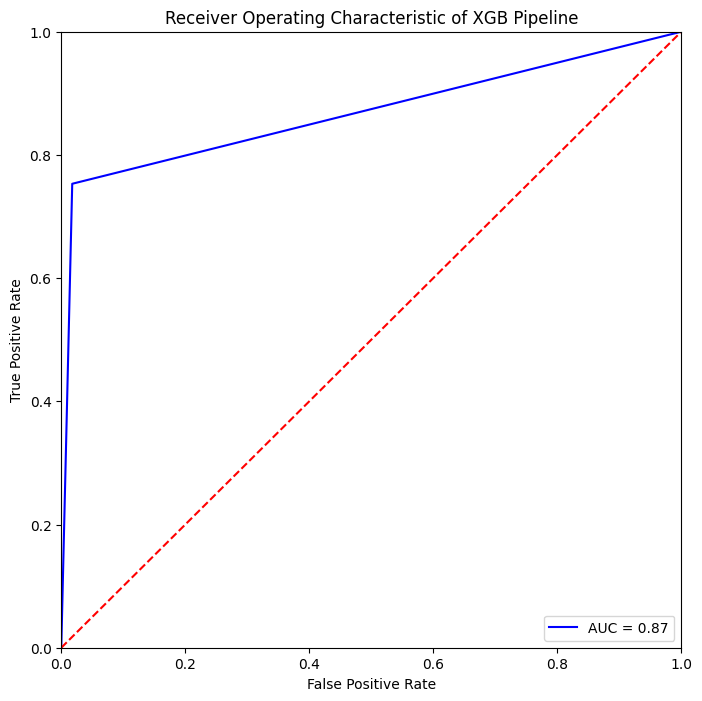

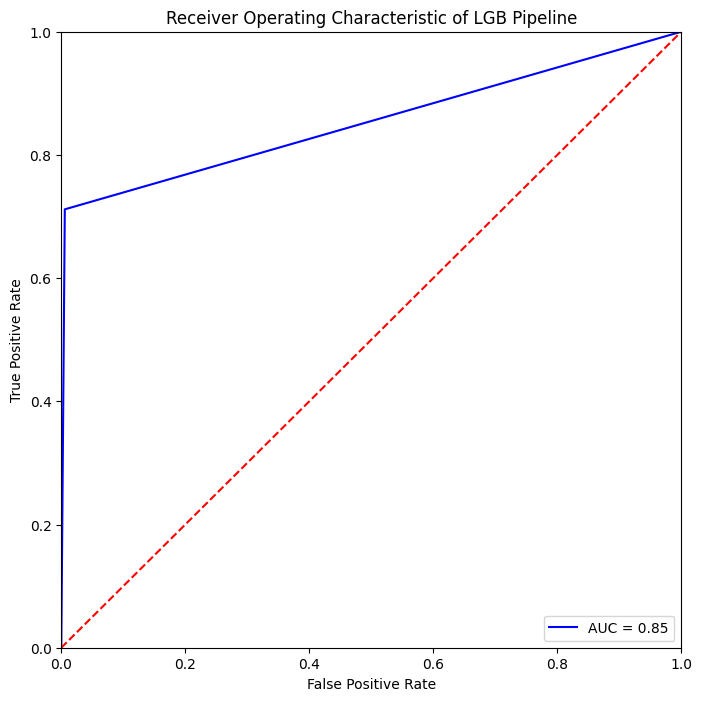

In [74]:
def funct_roc(y_test,preds,title):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,8))
    plt.title(f'Receiver Operating Characteristic of {title}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#     # method II: ggplot
#     from ggplot import *
#     df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#     ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

funct_roc(y_test,preds_xgb,"XGB Pipeline")
funct_roc(y_test,preds_lgb,"LGB Pipeline")


In [75]:
print(f"The MCC score of XGB Pipeline is:{matthews_corrcoef(y_test, preds_xgb)}")
print(f"The MCC score of LGB Pipeline is:{matthews_corrcoef(y_test, preds_lgb)}")

The MCC score of XGB Pipeline is:0.7939045331527683
The MCC score of LGB Pipeline is:0.7958996987500818


In [82]:
from sklearn.preprocessing import OneHotEncoder


FOR XGB PIPELINE:



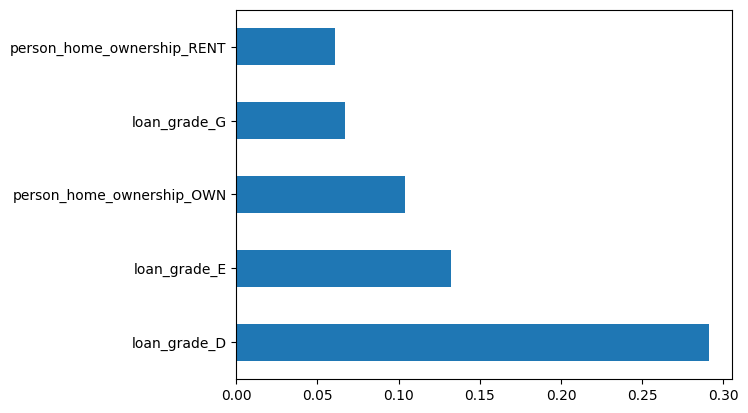


FOR LGBM PIPELINE:



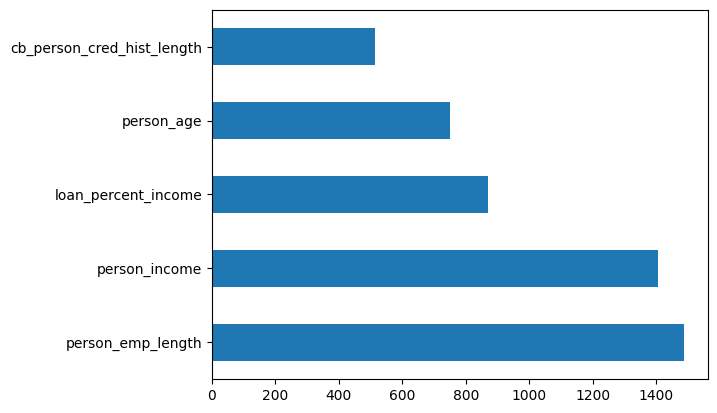

In [84]:
# Assuming 'coltf' is your ColumnTransformer step in the pipeline
cat_cols_transformer = pipe_lgb.named_steps["coltf"]
feature_names = []

# Iterate over named transformers to find the OneHotEncoder transformer
for name, transformer in cat_cols_transformer.named_transformers_.items():
    if isinstance(transformer, OneHotEncoder):
        feature_names = list(transformer.get_feature_names_out())
        break

ncol = ncol.delete(ncol.get_loc("loan_status"))  # ncol is an index object, not an array object
ncol = ncol.delete(ncol.get_loc("loan_int_rate"))
train_col = list(ncol) + feature_names  # Final list of columns

print("FOR XGB PIPELINE:\n")
funct_fi(pipe_xgb, train_col)
print("\nFOR LGBM PIPELINE:\n")
funct_fi(pipe_lgb, train_col)




## Pickling the best Pipeline:

In [85]:
# Save the ML Pipeline:
import joblib
joblib.dump(pipe_lgb, 'best_pipeline.pkl')

['best_pipeline.pkl']

In [86]:
X.person_home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [88]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00


In [92]:
import streamlit as st
import pandas as pd
from PIL import Image
import joblib
import json

# Function to load the model pipeline
def load_model():
    return joblib.load('best_pipeline.pkl')

# Function to display introduction page
def page_intro():
    st.title("Welcome to this Mock Credit Risk Simulator")
    st.header("Here's the drill. You get me whatever I need and I predict whether you are eligible or not. DEAL!")
    st.subheader("Let's get started...")
    image = Image.open('Credit_Risk.jpg')
    st.image(image, use_column_width=True)

# Function to display prediction page
def page_predict():
    st.header("Gimme your details and I will deliver magic!")
    data = {}

    # Input fields for user details
    data["First Name"] = st.text_input("Enter your First Name:")
    data["Last Name"] = st.text_input("Enter your Last Name:")
    data["Age"] = st.slider("Enter your Age:", 10, 70)
    data["Annual Income"] = st.number_input("Enter your Annual Income:", 1000, 100000)
    data["Home Ownership"] = st.selectbox("What is the type of House Ownership:", ["RENT", "OWN", "MORTGAGE", "OTHER"])
    data["Employment Length"] = st.number_input("Enter your Work Experience in years:", 2, 50)
    data["Loan Intent"] = st.selectbox("Why do you want a loan?", ['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'])
    data["Loan Grade"] = st.selectbox("Grade of Loan expected?", ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    data["Loan Amount"] = st.number_input("Enter the Loan Amount:", 100, 50000)
    data["Loan Percent Income"] = st.number_input("Enter your % Income to be used for repaying:", 0, 100)
    data["Previous Defaults"] = st.selectbox("Have your ever defaulted?", ["Y", "N"])
    data["Number of Defaults"] = st.slider("Total Number of Defaults:", 0, 50)

    # Display submitted data as JSON and DataFrame
    if st.button("Display Data"):
        data_display = json.dumps(data)
        temp = pd.DataFrame(data, index=[0])
        st.write("The data in JSON Format:")
        st.write(data_display)
        st.write("\nThe data in Tabular Format:")
        st.write(temp)

    # Perform prediction on submitted data
    if st.button("Predict Credit Score"):
        cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
        input_data = pd.DataFrame([data], columns=cols)
        pipe = load_model()
        prediction = pipe.predict(input_data)[0]
        outcome = {1: "The Customer is capable of DEFAULTING. Hence it is RISKY to provide loan!", 0: "The Customer is capable of NOT DEFAULTING. Hence it is POSSIBLE to provide loan!"}
        st.write(f"The Final Verdict obtained from the given model is that: {outcome[prediction]}")

# Main function to run the app
def main():
    st.sidebar.subheader("Here's what you can do:")
    option = st.sidebar.selectbox("Choose what you want to do:", ["Introduction", "Predict your Credit Score"])
    if option == "Introduction":
        page_intro()
    elif option == "Predict your Credit Score":
        page_predict()

if __name__ == "__main__":
    main()


In [99]:
! pip install streamlit -q

In [100]:
!wget -q -O - ipv4.icanhazip.com

35.234.16.139


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

In [101]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2024-04-30 07:24:56--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  6.09MB/s    in 2.2s    

2024-04-30 07:24:59 (6.09 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [102]:
get_ipython().system_raw('./ngrok http 8501 &')
